# Importing Libraries 📚

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
from scipy import stats
from scipy.stats import skew
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# EDA

![Pipeline](Pipeline.jpg)


## Business prescriptive   (Business goals)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;">This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.   </p>
</div>


## Descriptive Analysis (Understanding data)


In [102]:
#take alook over our data 
df =pd.read_csv('./data/application_data.csv')

In [103]:
pd.set_option('display.max_columns',None)

In [104]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
178267,306578,0,Cash loans,M,Y,Y,0,202500.0,450000.0,32742.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.026392,-10353,-1691,-4949.0,-1303,8.0,1,1,0,1,0,0,Drivers,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Business Entity Type 3,NaN,0.671691,0.554947,0.0608,NaN,0.9871,NaN,NaN,0.00,0.1379,0.1667,NaN,NaN,NaN,0.0560,NaN,0.0000,0.0620,NaN,0.9871,NaN,NaN,0.0000,0.1379,0.1667,NaN,NaN,NaN,0.0583,NaN,0.0,0.0614,NaN,0.9871,NaN,NaN,0.00,0.1379,0.1667,NaN,NaN,NaN,0.0570,NaN,0.0,NaN,block of flats,0.0440,"Stone, brick",No,9.0,1.0,9.0,0.0,-685.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8675,110099,1,Cash loans,F,N,N,0,180000.0,269550.0,12001.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.008474,-15032,-1691,-2752.0,-4712,NaN,1,1,0,1,0,0,Medicine staff,1.0,2,2,WEDNESDAY,9,0,0,0,0,1,1,Medicine,NaN,0.163489,0.209155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-57.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
87884,202019,0,Cash loans,F,N,N,0,90000.0,315000.0,16213.5,315000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.018634,-20600,365243,-1414.0,-2548,NaN,1,0,0,1,0,0,NaN,1.0,2,2,TUESDAY,10,0,0,0,0,0,0,XNA,NaN,0.589144,0.612704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-714.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
193551,324450,0,Cash loans,F,Y,Y,0,135000.0,238500.0,11

In [105]:
column_names = list(df.columns)
print(column_names)



['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [106]:
df.shape

(307511, 122)

In [107]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Descriptive Analysis (Overview data)

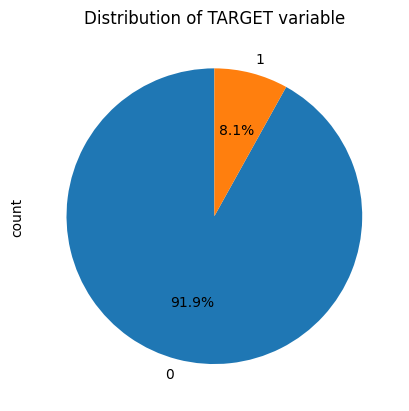

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [109]:
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TARGET variable')
plt.show()
print(df['TARGET'].value_counts())

In [110]:
# imbalanced dataset 

# Column Categorization:

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    
    <p style="color: white;"> Create a Summary Column that describes whether the person provided all required documents or not, and display the number of documents they submitted.   </p>
</div>


In [111]:
document_columns = ['FLAG_DOCUMENT_' + str(i) for i in range(2, 22)]
df['NUM_DOCUMENTS_PROVIDED'] = df[document_columns].sum(axis=1)
df['NUM_DOCUMENTS_PROVIDED'].value_counts()

NUM_DOCUMENTS_PROVIDED
1    270056
0     29549
2      7742
3       163
4         1
Name: count, dtype: int64

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">  
    <p style="color: white;"> After creating the summary column, drop columns Flag_documents from 2 to 21 to reduce the number of columns and avoid clutter.   </p>
</div>


In [112]:
column = ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']
df = df.drop(column, axis=1)

In [113]:
df.shape

(307511, 103)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;"> Next, I created a function to check the percentage of missing data in each column.   </p>
</div>


In [114]:
def missing_data(df,percentage):
    missing_percentage = df.isnull().mean() * 100
    missing_info = pd.DataFrame({
        'Column': missing_percentage.index,
        'Missing Percentage': missing_percentage.values
            })

    print(missing_info[missing_info['Missing Percentage'] > percentage])


In [115]:
missing_data(df,19)

                          Column  Missing Percentage
21                   OWN_CAR_AGE           65.990810
28               OCCUPATION_TYPE           31.345545
41                  EXT_SOURCE_1           56.381073
43                  EXT_SOURCE_3           19.825307
44                APARTMENTS_AVG           50.749729
45              BASEMENTAREA_AVG           58.515956
46   YEARS_BEGINEXPLUATATION_AVG           48.781019
47               YEARS_BUILD_AVG           66.497784
48                COMMONAREA_AVG           69.872297
49                 ELEVATORS_AVG           53.295980
50                 ENTRANCES_AVG           50.348768
51                 FLOORSMAX_AVG           49.760822
52                 FLOORSMIN_AVG           67.848630
53                  LANDAREA_AVG           59.376738
54          LIVINGAPARTMENTS_AVG           68.354953
55                LIVINGAREA_AVG           50.193326
56       NONLIVINGAPARTMENTS_AVG           69.432963
57             NONLIVINGAREA_AVG           55.

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;"><h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">
In enhancing the dataset, strategic decisions were made regarding column retention:
High Missing Values: Certain columns contained substantial missing information (up to 70%). These were omitted to enhance the reliability of our dataset.   </p>
</div>


In [116]:

columns_to_drop = ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_3','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 
                   'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
                   'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
                   'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
                   'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                   'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
                   'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
                   'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                   'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
                   'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
                   'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                   'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
df = df.drop(columns=columns_to_drop)


In [117]:
df.shape

(307511, 53)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> Now, let's assess the percentage of columns with minimal missing values.   </p>
</div>


In [118]:
missing_data(df,0)

                        Column  Missing Percentage
9                  AMT_ANNUITY            0.003902
10             AMT_GOODS_PRICE            0.090403
11             NAME_TYPE_SUITE            0.420148
27             OCCUPATION_TYPE           31.345545
28             CNT_FAM_MEMBERS            0.000650
40                EXT_SOURCE_2            0.214626
41    OBS_30_CNT_SOCIAL_CIRCLE            0.332021
42    DEF_30_CNT_SOCIAL_CIRCLE            0.332021
43    OBS_60_CNT_SOCIAL_CIRCLE            0.332021
44    DEF_60_CNT_SOCIAL_CIRCLE            0.332021
45      DAYS_LAST_PHONE_CHANGE            0.000325
46  AMT_REQ_CREDIT_BUREAU_HOUR           13.501631
47   AMT_REQ_CREDIT_BUREAU_DAY           13.501631
48  AMT_REQ_CREDIT_BUREAU_WEEK           13.501631
49   AMT_REQ_CREDIT_BUREAU_MON           13.501631
50   AMT_REQ_CREDIT_BUREAU_QRT           13.501631
51  AMT_REQ_CREDIT_BUREAU_YEAR           13.501631


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">
To address missing values in the dataset, a targeted imputation strategy has been devised for specific columns based on their nature and characteristics. The following conclusions outline the chosen imputation methods for each identified column:
1-Numerical Columns with Low Missing Percentages:
For columns with low missing percentages, such as AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS, EXT_SOURCE_2, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, and DAYS_LAST_PHONE_CHANGE, missing values will be imputed using the median. This choice ensures a robust central tendency measure without being heavily influenced by potential outliers.       
2-Categorical Column:
For the categorical column OCCUPATION_TYPE i decideed to keep it, with a high missing percentage, imputation will be performed using the value "unknown." This strategy allows for the preservation of the distinct category representing missing values.
Categorical Column with Low Missing Percentage:        
3-For the categorical column NAME_TYPE_SUITE with a relatively low missing percentage, imputation will be carried out using the mode. This choice is suitable for preserving the dominant category within the column.   </p>
</div>


In [119]:
numerical_columns_low_missing = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
                                  'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
df[numerical_columns_low_missing] = df[numerical_columns_low_missing].fillna(df[numerical_columns_low_missing].median())

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('unknown')

df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;">lets check missing values again .</p>
</div>


In [120]:
missing_data(df,0)

                        Column  Missing Percentage
46  AMT_REQ_CREDIT_BUREAU_HOUR           13.501631
47   AMT_REQ_CREDIT_BUREAU_DAY           13.501631
48  AMT_REQ_CREDIT_BUREAU_WEEK           13.501631
49   AMT_REQ_CREDIT_BUREAU_MON           13.501631
50   AMT_REQ_CREDIT_BUREAU_QRT           13.501631
51  AMT_REQ_CREDIT_BUREAU_YEAR           13.501631


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">AMT_REQ_CREDIT_BUREAU:</h1>
    <p style="color: white;"> This part of the variable name suggests that it might be related to the number of requests made to the credit bureau. In the context of credit card fraud detection, this could be relevant because a sudden increase in credit inquiries might be a red flag.   </p>
</div>


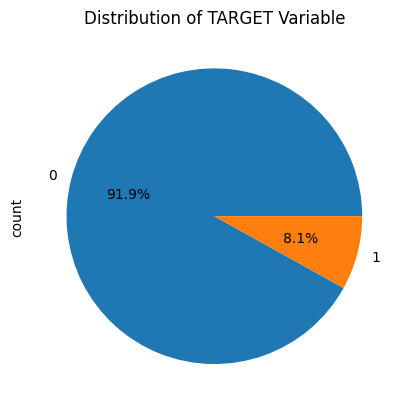

In [121]:
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', labels=['0','1'])
plt.title('Distribution of TARGET Variable')
plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">
For these six columns with a consistent 13% missing data, I'm taking a distinct approach. First, I'm grouping numerical columns like AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, and others. Instead of randomly filling in missing values, I'm creating bins to better understand and handle the data.
Now, upon reflection, I'm adjusting the strategy. Given the dataset's imbalance, I'll assess the missing values in these columns based on the target variable. If it's the majority class, I'll drop the missing values. However, for the minority class, I'll retain the missing values. This tailored approach aims to optimize model performance while considering the dataset's imbalance.   </p>
</div>


In [122]:
missing_percentage_by_target = df.groupby(df['TARGET'])['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(lambda x: x.isnull().mean() * 100)
print(missing_percentage_by_target)


TARGET
0    13.169029
1    17.289023
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


In [123]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;"> 
    <p style="color: white;"> Considering the dataset's imbalance, I've opted to remove rows associated with category 0 in the target variable and retain those belonging to category 1. This decision aims to address the imbalance and enhance the model's effectiveness.   </p>
</div>


In [124]:
rows_to_drop = df[(df['TARGET'] == 0) & df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().any(axis=1)].index
df = df.drop(rows_to_drop)
print("Shape of the filtered DataFrame:", df.shape)

Shape of the filtered DataFrame: (270284, 53)


In [125]:
missing_data(df,0)

                        Column  Missing Percentage
46  AMT_REQ_CREDIT_BUREAU_HOUR            1.587959
47   AMT_REQ_CREDIT_BUREAU_DAY            1.587959
48  AMT_REQ_CREDIT_BUREAU_WEEK            1.587959
49   AMT_REQ_CREDIT_BUREAU_MON            1.587959
50   AMT_REQ_CREDIT_BUREAU_QRT            1.587959
51  AMT_REQ_CREDIT_BUREAU_YEAR            1.587959


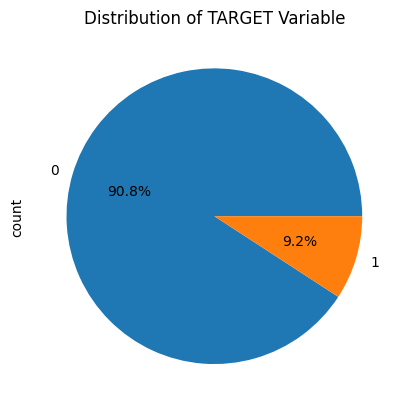

In [126]:
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', labels=['0', '1'])
plt.title('Distribution of TARGET Variable')
plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    
    <p style="color: white;">now lets create binned columns of these columns to be more interbatbly in eda process    </p>
</div>


In [127]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = pd.to_numeric(df['AMT_REQ_CREDIT_BUREAU_YEAR'], errors='coerce')

bin_edges = [0, 5, 10, 20]  # Adjust the bin edges as needed
bin_labels = ['Low from 0 to 5', 'Medium from 6 to 10', 'High +11']

df['AMT_REQ_CREDIT_BUREAU_YEAR_Binned'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=bin_edges, labels=bin_labels, right=False)

unknown_category = 'unknown'
df['AMT_REQ_CREDIT_BUREAU_YEAR_Binned'] = df['AMT_REQ_CREDIT_BUREAU_YEAR_Binned'].cat.add_categories([unknown_category])

df['AMT_REQ_CREDIT_BUREAU_YEAR_Binned'] = df['AMT_REQ_CREDIT_BUREAU_YEAR_Binned'].fillna(unknown_category)

bin_counts = df['AMT_REQ_CREDIT_BUREAU_YEAR_Binned'].value_counts().sort_index()

print(bin_counts)


AMT_REQ_CREDIT_BUREAU_YEAR_Binned
Low from 0 to 5        239740
Medium from 6 to 10     26111
High +11                  136
unknown                  4297
Name: count, dtype: int64


In [128]:
# Assuming 'df' is your DataFrame

# Convert the column to numeric, coercing errors to NaN
df['AMT_REQ_CREDIT_BUREAU_QRT'] = pd.to_numeric(df['AMT_REQ_CREDIT_BUREAU_QRT'], errors='coerce')

# Define bin edges and labels
bin_edges = [0, 5, float('inf')]  # Adjust the bin edges as needed
bin_labels = ['Low from 0 to 5', 'High above 5']

# Create a new column with bins
df['AMT_REQ_CREDIT_BUREAU_QRT_Binned'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_QRT'], bins=bin_edges, labels=bin_labels, right=False)

unknown_category = 'unknown'
df['AMT_REQ_CREDIT_BUREAU_QRT_Binned'] = df['AMT_REQ_CREDIT_BUREAU_QRT_Binned'].cat.add_categories([unknown_category])


df['AMT_REQ_CREDIT_BUREAU_QRT_Binned'] = df['AMT_REQ_CREDIT_BUREAU_QRT_Binned'].fillna(unknown_category)

# Display the counts in each bin
bin_counts = df['AMT_REQ_CREDIT_BUREAU_QRT_Binned'].value_counts().sort_index()
print(bin_counts)


AMT_REQ_CREDIT_BUREAU_QRT_Binned
Low from 0 to 5    265884
High above 5          108
unknown              4292
Name: count, dtype: int64


In [129]:
# Assuming 'df' is your DataFrame

# Convert the column to numeric, coercing errors to NaN
df['AMT_REQ_CREDIT_BUREAU_MON'] = pd.to_numeric(df['AMT_REQ_CREDIT_BUREAU_MON'], errors='coerce')

# Define bin edges and labels
bin_edges = [0, 5, 10, float('inf')]  # Adjust the bin edges as needed
bin_labels = ['Low from 0 to 5', 'Medium from 6 to 10', 'High +10']

# Create a new column with bins
df['AMT_REQ_CREDIT_BUREAU_MON_Binned'] = pd.cut(df['AMT_REQ_CREDIT_BUREAU_MON'], bins=bin_edges, labels=bin_labels, right=False)

unknown_category = 'unknown'
df['AMT_REQ_CREDIT_BUREAU_MON_Binned'] = df['AMT_REQ_CREDIT_BUREAU_MON_Binned'].cat.add_categories([unknown_category])


df['AMT_REQ_CREDIT_BUREAU_MON_Binned'] = df['AMT_REQ_CREDIT_BUREAU_MON_Binned'].fillna(unknown_category)

# Display the counts in each bin
bin_counts = df['AMT_REQ_CREDIT_BUREAU_MON_Binned'].value_counts().sort_index()
print(bin_counts)


AMT_REQ_CREDIT_BUREAU_MON_Binned
Low from 0 to 5        263833
Medium from 6 to 10      1634
High +10                  525
unknown                  4292
Name: count, dtype: int64


In [130]:

columns_to_process = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR']

df[columns_to_process] = df[columns_to_process].apply(pd.to_numeric, errors='coerce')

# Define bin edges and labels
bin_edges = [0, 2, float('inf')]  # Adjust the bin edges as needed
bin_labels = ['Low from 0 to 2', 'High above 2']

# Iterate over columns
for column in columns_to_process:
    # Create a new column with bins
    bin_column_name = f'{column}_Binned'
    df[bin_column_name] = pd.cut(df[column], bins=bin_edges, labels=bin_labels, right=False)

    # Add an 'unknown' category
    unknown_category = 'unknown'
    df[bin_column_name] = df[bin_column_name].cat.add_categories([unknown_category])

    # Fill missing values with 'unknown'
    df[bin_column_name] = df[bin_column_name].fillna(unknown_category)

    # Display the counts in each bin
    bin_counts = df[bin_column_name].value_counts().sort_index()
    print(f"Counts for {bin_column_name}:")
    print(bin_counts)


Counts for AMT_REQ_CREDIT_BUREAU_DAY_Binned:
AMT_REQ_CREDIT_BUREAU_DAY_Binned
Low from 0 to 2    265795
High above 2          197
unknown              4292
Name: count, dtype: int64
Counts for AMT_REQ_CREDIT_BUREAU_WEEK_Binned:
AMT_REQ_CREDIT_BUREAU_WEEK_Binned
Low from 0 to 2    265664
High above 2          328
unknown              4292
Name: count, dtype: int64
Counts for AMT_REQ_CREDIT_BUREAU_HOUR_Binned:
AMT_REQ_CREDIT_BUREAU_HOUR_Binned
Low from 0 to 2    265926
High above 2           66
unknown              4292
Name: count, dtype: int64


In [131]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCUMENTS_PROVIDED,AMT_REQ_CREDIT_BUREAU_YEAR_Binned,AMT_REQ_CREDIT_BUREAU_QRT_Binned,AMT_REQ_CREDIT_BUREAU_MON_Binned,AMT_REQ_CREDIT_BUREAU_DAY_Binned,AMT_REQ_CREDIT_BUREAU_WEEK_Binned,AMT_REQ_CREDIT_BUREAU_HOUR_Binned
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2


In [132]:
df.shape

(270284, 59)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">After creating the binned columns, I will now proceed to drop the original columns to minimize non-informative features and reduce the overall number of columns.   </p>
</div>


In [133]:
column = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
df = df.drop(column, axis=1)

In [134]:
missing_data(df,0)

Empty DataFrame
Columns: [Column, Missing Percentage]
Index: []


In [135]:
df.shape

(270284, 53)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">The steps for handling missing values are now complete.</p>
</div>

In [136]:
df.shape

(270284, 53)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">Now, let's check for duplicate data points.   </p>
</div>

In [137]:
duplicates = df.duplicated()
print("Total number of duplicate rows:", duplicates.sum())

Total number of duplicate rows: 0


In [138]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270284 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   SK_ID_CURR                         270284 non-null  int64   
 1   TARGET                             270284 non-null  int64   
 2   NAME_CONTRACT_TYPE                 270284 non-null  object  
 3   CODE_GENDER                        270284 non-null  object  
 4   FLAG_OWN_CAR                       270284 non-null  object  
 5   FLAG_OWN_REALTY                    270284 non-null  object  
 6   CNT_CHILDREN                       270284 non-null  int64   
 7   AMT_INCOME_TOTAL                   270284 non-null  float64 
 8   AMT_CREDIT                         270284 non-null  float64 
 9   AMT_ANNUITY                        270284 non-null  float64 
 10  AMT_GOODS_PRICE                    270284 non-null  float64 
 11  NAME_TYPE_SUITE                

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">Now, let's correct the data types of columns with only two/three/.. outcomes and treat them as integers.   </p>
</div>


In [140]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     270284
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17408
DAYS_EMPLOYED                   12408
DAYS_ID_PUBLISH                  6152
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
NUM_DOCUMENTS_PROVIDED              5
dtype: int64

In [141]:
categorical_columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'SK_ID_CURR','FLAG_WORK_PHONE','TARGET', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'NUM_DOCUMENTS_PROVIDED',
                       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                      'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']

df[categorical_columns] = df[categorical_columns].astype('category')


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270284 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   SK_ID_CURR                         270284 non-null  category
 1   TARGET                             270284 non-null  category
 2   NAME_CONTRACT_TYPE                 270284 non-null  object  
 3   CODE_GENDER                        270284 non-null  object  
 4   FLAG_OWN_CAR                       270284 non-null  object  
 5   FLAG_OWN_REALTY                    270284 non-null  object  
 6   CNT_CHILDREN                       270284 non-null  int64   
 7   AMT_INCOME_TOTAL                   270284 non-null  float64 
 8   AMT_CREDIT                         270284 non-null  float64 
 9   AMT_ANNUITY                        270284 non-null  float64 
 10  AMT_GOODS_PRICE                    270284 non-null  float64 
 11  NAME_TYPE_SUITE                

In [143]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype('object')


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">Create a function to plot univariate analysis, incorporating histograms, box plots, and quantile-quantile (QQ) plots to gain a clear understanding of our data and resume the data EDA process.   </p>
</div>


In [144]:
def plot_numerical_univariate_analysis(df, column_name):
    if df[column_name].dtype in ['int64', 'float64']:
        plt.figure(figsize=(12, 6))

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True, color='blue')
        plt.title('Histogram')

        # QQ Plot
        plt.subplot(1, 3, 2)
        stats.probplot(df[column_name], plot=plt)
        plt.title('QQ Plot')

        # Box Plot
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df[column_name], color='green')
        plt.title('Box Plot')

        plt.show()



In [145]:
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# for col in numerical_columns:
#     plot_numerical_univariate_analysis(df, col)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> Upon reviewing the plots, I observed that columns such as 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', and 'DAYS_LAST_PHONE_CHANGE' could provide more meaningful insights if we convert them into years. To facilitate analysis, I will create binned columns for each of these variables.
Additionally, I plan to apply a similar transformation to 'OBS_30_CNT_SOCIAL_CIRCLE' and create a binned version for better analysis and interpretation.
</p>
</div>


# Feature Engineering

In [146]:
columns_to_remove_sign = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
df[columns_to_remove_sign] = df[columns_to_remove_sign].abs()

# Feature engineering
df['AGE'] = df['DAYS_BIRTH'] // 365
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'] // 365
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'] // 365
df['YEARS_LAST_PHONE_CHANGE'] =df['DAYS_LAST_PHONE_CHANGE'] /365

# Define bin edges and labels for AGE_Binned
age_bin_edges = [18, 30, 40, 50, 60, 70, 80]
age_bin_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '+71']

# Define bin edges and labels for YEARS_EMPLOYED_Binned and YEARS_REGISTRATION_Binned
employment_bin_edges = [0, 5, 12, 20, float('inf')]
employment_bin_labels = ['0-5', '6-12', '13-20', '+25']

# Apply binning to the newly created features
df['AGE_Binned'] = pd.cut(df['AGE'], bins=age_bin_edges, labels=age_bin_labels, right=False)
df['YEARS_EMPLOYED_Binned'] = pd.cut(df['YEARS_EMPLOYED'], bins=employment_bin_edges, labels=employment_bin_labels, right=False)
df['YEARS_REGISTRATION_Binned'] = pd.cut(df['YEARS_REGISTRATION'], bins=employment_bin_edges, labels=employment_bin_labels, right=False)
df['YEARS_ID_PUBLISH_Binned'] = pd.cut(df['YEARS_ID_PUBLISH'], bins=age_bin_edges, labels=age_bin_labels, right=False)

# Drop original columns
df = df.drop(columns_to_remove_sign, axis=1)


In [147]:
bin_edges = [0, 5, 10, float('inf')]
bin_labels = ['0-5', '6-10', '11+']

df['OBS_30_CNT_SOCIAL_CIRCLE_Binned'] = pd.cut(df['OBS_30_CNT_SOCIAL_CIRCLE'], bins=bin_edges, labels=bin_labels, right=False)
df['OBS_60_CNT_SOCIAL_CIRCLE_Binned'] = pd.cut(df['OBS_60_CNT_SOCIAL_CIRCLE'], bins=bin_edges, labels=bin_labels, right=False)
df['DEF_30_CNT_SOCIAL_CIRCLE_Binned'] = pd.cut(df['DEF_30_CNT_SOCIAL_CIRCLE'], bins=bin_edges, labels=bin_labels, right=False)
df['DEF_60_CNT_SOCIAL_CIRCLE_Binned'] = pd.cut(df['DEF_60_CNT_SOCIAL_CIRCLE'], bins=bin_edges, labels=bin_labels, right=False)

for col in ['OBS_30_CNT_SOCIAL_CIRCLE_Binned', 'OBS_60_CNT_SOCIAL_CIRCLE_Binned', 
            'DEF_30_CNT_SOCIAL_CIRCLE_Binned', 'DEF_60_CNT_SOCIAL_CIRCLE_Binned']:
    bin_counts = df[col].value_counts().sort_index()
    print(f"{col}:\n{bin_counts}\n")

df = df.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
              'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], axis=1)


OBS_30_CNT_SOCIAL_CIRCLE_Binned:
OBS_30_CNT_SOCIAL_CIRCLE_Binned
0-5     244096
6-10     22518
11+       3670
Name: count, dtype: int64

OBS_60_CNT_SOCIAL_CIRCLE_Binned:
OBS_60_CNT_SOCIAL_CIRCLE_Binned
0-5     244544
6-10     22184
11+       3556
Name: count, dtype: int64

DEF_30_CNT_SOCIAL_CIRCLE_Binned:
DEF_30_CNT_SOCIAL_CIRCLE_Binned
0-5     270222
6-10        61
11+          1
Name: count, dtype: int64

DEF_60_CNT_SOCIAL_CIRCLE_Binned:
DEF_60_CNT_SOCIAL_CIRCLE_Binned
0-5     270262
6-10        21
11+          1
Name: count, dtype: int64



<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE:
 The majority of clients have 0-5 observations in their social surroundings with observable 30/60 days past due (DPD) default.
 Higher counts are relatively rare, with only a few clients falling into this category.
 DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE:
 Most clients have 0 observations of social surroundings that defaulted on 30/60 DPD.
 A small percentage of clients have 1-5 observations of defaults.
 These binned columns offer a clearer view of the distribution of observations in each category, providing valuable insights into the dataset.</p>
</div>


In [148]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'NUM_DOCUMENTS_PROVIDED',
       'AMT_REQ_CREDIT_BUREAU_YEAR_Binned', 'AMT_REQ_CREDIT_BUREAU_QRT_Binned',
       'AMT_REQ_CREDIT_BUREAU_MO

In [149]:
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# for col in numerical_columns:
#     plot_numerical_univariate_analysis(df, col)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;"> <p style="color: white;">I've observed a significant number of outliers in the 'AMIT' column, as well as in 'Annuity' and 'Credit.' Let's conduct a detailed analysis to gain a deeper understanding of these outliers..</p>
</div>


In [150]:
outliers = {}
for column in ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df['TARGET'] == 0) & ((df[column] < lower_bound) | (df[column] > upper_bound))]

# Visualize outliers
# for column, outlier_df in outliers.items():
#     sns.boxplot(x='TARGET', y=column, data=outlier_df)
#     plt.title(f'Outliers in {column} by TARGET')
#     plt.show()

In [151]:
# Step 2: Combine Data
outliers_df = pd.concat(outliers.values()).drop_duplicates()

# Step 3: Analyze Categorical Columns
category_counts_income_type = outliers_df['NAME_INCOME_TYPE'].value_counts()
category_counts_occupation_type = outliers_df['OCCUPATION_TYPE'].value_counts()
target = outliers_df['TARGET'].value_counts()

# Display the results
print("Outliers in NAME_INCOME_TYPE:")
print(category_counts_income_type)

print("\nOutliers in OCCUPATION_TYPE:")
print(category_counts_occupation_type)

print("\nOutliers in Target:")
print(target)

Outliers in NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Commercial associate    7859
Working                 7296
State servant           1852
Pensioner               1778
Businessman                2
Student                    1
Name: count, dtype: int64

Outliers in OCCUPATION_TYPE:
OCCUPATION_TYPE
unknown                  4638
Managers                 4524
Laborers                 2145
Core staff               2000
Sales staff              1197
Drivers                  1087
Accountants              1048
High skill tech staff     907
Medicine staff            335
Security staff            202
Private service staff     198
Cooking staff             123
IT staff                   74
Cleaning staff             72
Secretaries                69
HR staff                   66
Realty agents              51
Waiters/barmen staff       31
Low-skill Laborers         21
Name: count, dtype: int64

Outliers in Target:
TARGET
0    18788
1        0
Name: count, dtype: int64


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;"> <p style="color: white;">After conducting analysis, I've discovered that all these outliers exist in category 0 of the loan default variable. It seems logical that those who paid off the loan might have significant annuity income, which could explain the outliers. Therefore, I've decided to retain these data points and not remove them, considering their potential relevance to the analysis.</p>
</div>


In [152]:
# Define the summary statistics function
def summary_stats(series):
    return pd.Series({
        'mean': series.mean(),
        'median': series.median(),
        'std': series.std(),
        'iqr': series.quantile(0.75) - series.quantile(0.25),
        'var': series.var(),
        'min': series.min(),
        'max': series.max()
    })

# Specify the numerical columns
numerical_columns = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT','AGE']

# Filter data for 'target' == 0 and 'target' == 1 separately
summary_statistics_target_0 = df[df['TARGET'] == 0][numerical_columns].apply(summary_stats).T
summary_statistics_target_1 = df[df['TARGET'] == 1][numerical_columns].apply(summary_stats).T

# Display the results
print("*******************Summary Statistics for Target == 0********************************")
print(summary_statistics_target_0)

print("\n*******************Summary Statistics for Target == 1********************************")
print(summary_statistics_target_1)


*******************Summary Statistics for Target == 0********************************
                           mean    median            std       iqr  \
AMT_INCOME_TOTAL  171378.154850  157500.0  102904.992236   90000.0   
AMT_ANNUITY        27227.367982   24939.0   14549.019785   18328.5   
AMT_CREDIT        609701.183399  521280.0  409085.693256  549432.0   
AGE                   43.911256      43.0      11.805541      20.0   

                           var      min        max  
AMT_INCOME_TOTAL  1.058944e+10  26100.0  9000000.0  
AMT_ANNUITY       2.116740e+08   1615.5   258025.5  
AMT_CREDIT        1.673511e+11  45000.0  4050000.0  
AGE               1.393708e+02     20.0       69.0  

*******************Summary Statistics for Target == 1********************************
                           mean    median            std       iqr  \
AMT_INCOME_TOTAL  165611.760906  135000.0  746676.959440   90000.0   
AMT_ANNUITY        26481.744290   25263.0   12450.676999   15615.0   
A

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;"><h1 style="color: white ;">conclusions:</h1> <p style="color: white;">Individuals with Target == 1 tend to have slightly lower average income and annuity amounts compared to those with Target == 0.
The standard deviation and range of values for income and credit amounts are significantly higher for Target == 1, indicating a more diverse financial profile in this category.</p>
</div>


In [153]:
df['YEARS_EMPLOYED'].value_counts()

YEARS_EMPLOYED
1000    48243
1       27312
2       25503
0       23828
3       21887
4       19085
5       14400
6       13462
7       11767
8       10228
9        8134
10       6675
11       5347
12       4803
14       4157
13       4000
15       2472
16       2114
17       1817
18       1780
19       1711
20       1465
21       1331
22       1141
23        931
24        850
25        752
26        619
27        605
28        580
29        522
30        418
31        413
34        337
32        317
33        294
35        237
36        189
37        128
39        117
38        104
40         53
41         50
42         37
44         29
43         18
45         14
48          4
46          2
47          1
49          1
Name: count, dtype: int64

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">A crucial observation is the substantial presence of outliers in the newly created year-based columns. To gain deeper insights and a clearer understanding, let's conduct a thorough investigation into these outliers.   </p>
</div>


In [154]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
     # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()
    
    return outliers


In [155]:
# columns_to_check = ['YEARS_ID_PUBLISH', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AGE']

# for column in columns_to_check:
#     outliers = detect_outliers_iqr(df, column)
#     num_outliers = outliers.shape[0]
#     print(f"Number of outliers in '{column}': {num_outliers}")

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;">lets go deep and try to understand for what refer 1000    </p>
</div>


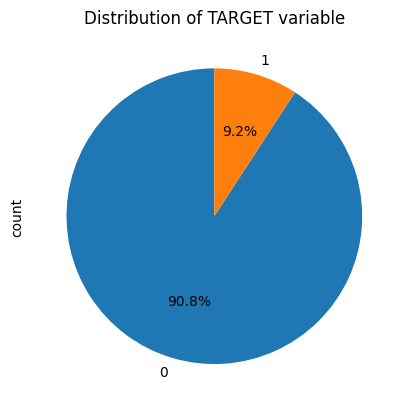

TARGET
0    245459
1     24825
Name: count, dtype: int64


In [156]:
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TARGET variable')
plt.show()
print(df['TARGET'].value_counts())

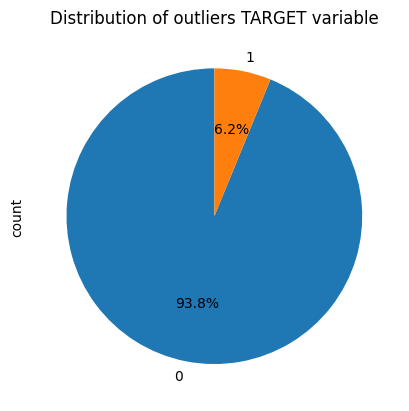

TARGET
0    45253
1     2990
Name: count, dtype: int64


In [157]:
outliers_data = df[df['YEARS_EMPLOYED'] > 50]

outliers_data['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of outliers TARGET variable')
plt.show()
print(outliers_data['TARGET'].value_counts())

# BEFORE

In [158]:
group_by_income_type = df.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})
group_by_income_type

YEARS_EMPLOYED                          AGE
                               mean  median   count   max median
NAME_INCOME_TYPE                                                
Businessman                7.000000     6.0       4    12   47.5
Commercial associate       5.441413     4.0   62710    48   39.0
Maternity leave            7.000000     8.0       3     9   35.0
Pensioner                999.815979  1000.0   48239  1000   60.0
State servant              9.121790     7.0   19665    48   40.0
Student                    6.600000     5.0      15    21   34.0
Unemployed              1000.000000  1000.0      13  1000   43.0
Working                    6.086619     4.0  139635    49   40.0

In [159]:
df['YEARS_EMPLOYED']=df['YEARS_EMPLOYED'].replace(1000, 25)
df['YEARS_EMPLOYED'].describe()

count    270284.000000
mean          9.533905
std           9.306800
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

# AFTER 

In [160]:
group_by_income_type = df.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})
group_by_income_type

YEARS_EMPLOYED                       AGE
                               mean median   count max median
NAME_INCOME_TYPE                                             
Businessman                7.000000    6.0       4  12   47.5
Commercial associate       5.441413    4.0   62710  48   39.0
Maternity leave            7.000000    8.0       3   9   35.0
Pensioner                 24.997886   25.0   48239  35   60.0
State servant              9.121790    7.0   19665  48   40.0
Student                    6.600000    5.0      15  21   34.0
Unemployed                25.000000   25.0      13  25   43.0
Working                    6.086619    4.0  139635  49   40.0

In [161]:
df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 139635
Commercial associate     62710
Pensioner                48239
State servant            19665
Student                     15
Unemployed                  13
Businessman                  4
Maternity leave              3
Name: count, dtype: int64

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> Perhaps, when creating the machine learning model, it might be suitable to drop values like 1000 in the 0 category, while retaining them in the 1 category along with null values. This consideration is based on the assumption that 1000 could represent a specific group, potentially indicating retired individuals. so i will replace 1000 value with 25 its logical and make sens  </p>
</div>


In [162]:
# df.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> Businessmen and commercial associates with higher education tend to have higher incomes, indicating a potential correlation between education level and income.
Commercial associates across different education levels show diverse income ranges, highlighting the impact of the industry on income variations.
Individuals with secondary education, especially working individuals, demonstrate a wide range of income levels, suggesting diverse career paths and opportunities.
Pensioners, state servants, and working individuals with various education levels exhibit varying income patterns, emphasizing the need for detailed analysis within each subgroup.
The presence of outliers, especially in categories with wide income ranges, may require further investigation to understand the factors contributing to extreme income values.</p>
</div>


In [163]:
df.shape

(270284, 57)

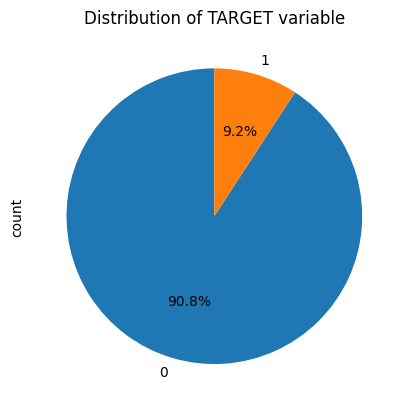

TARGET
0    245459
1     24825
Name: count, dtype: int64


In [164]:
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TARGET variable')
plt.show()
print(df['TARGET'].value_counts())

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">  Now, let's create a function to iterate over categorical variables and generate bar plots for visual analysis.  </p>
</div>


In [165]:
def plot_categorical_univariate(dataframe, categorical_column):
    unique_categories = dataframe[categorical_column].nunique()

    plt.figure(figsize=(12, 6))

    if unique_categories > 5:
        sns.countplot(data=dataframe, y=categorical_column, order=dataframe[categorical_column].value_counts().index)
        plt.xticks([])  # Remove x-axis ticks
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                               ha='left', va='center', xytext=(10, 0), textcoords='offset points')
    else:
        sns.countplot(data=dataframe, x=categorical_column, order=dataframe[categorical_column].value_counts().index)
        plt.yticks([])  # Remove y-axis ticks
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Univariate Analysis - {categorical_column}')
    plt.show()



    

In [166]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns 
categorical_columns = [col for col in categorical_columns if col != 'SK_ID_CURR']



In [167]:
# for col in categorical_columns:
#     plot_categorical_univariate(df, col)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">  since columns like ['YEARS_ID_PUBLISH_Binned', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
                   'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL','ext_source_2'] almost have one cat lets drop it to make our dataset roboust and powerful   </p>
</div>



In [168]:
columns_to_drop = ['YEARS_ID_PUBLISH_Binned', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
                   'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL','REG_REGION_NOT_WORK_REGION',
                   'REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY']
df = df.drop(columns_to_drop,axis=1)


In [169]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,NUM_DOCUMENTS_PROVIDED,AMT_REQ_CREDIT_BUREAU_YEAR_Binned,AMT_REQ_CREDIT_BUREAU_QRT_Binned,AMT_REQ_CREDIT_BUREAU_MON_Binned,AMT_REQ_CREDIT_BUREAU_DAY_Binned,AMT_REQ_CREDIT_BUREAU_WEEK_Binned,AMT_REQ_CREDIT_BUREAU_HOUR_Binned,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE,AGE_Binned,YEARS_EMPLOYED_Binned,YEARS_REGISTRATION_Binned,OBS_30_CNT_SOCIAL_CIRCLE_Binned,OBS_60_CNT_SOCIAL_CIRCLE_Binned,DEF_30_CNT_SOCIAL_CIRCLE_Binned,DEF_60_CNT_SOCIAL_CIRCLE_Binned
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,Business Entity Type 3,0.262949,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,25,1,9.0,3.106849,18-30,0-5,6-12,0-5,0-5,0-5,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,0,1,Core staff,2.0,1,1,MONDAY,11,0,0,School,0.622246,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,45,3,3.0,2.268493,41-50,0-5,0-5,0-5,0-5,0-5,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,Government,0.555912,0,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,52,0,11.0,2.232877,51-60,0-5,6-12,0-5,0-5,0-5,0-5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0,0,Core staff,1.0,2,2,THURSDAY,11,0,1,Religion,0.322738,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,54,8,11.0,3.030137,51-60,6-12,6-12,0-5,0-5,0-5,0-5
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,Laborers,2.0,2,2,WEDNESDAY,16,0,0,Other,0.354225,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,46,4,13.0,6.947945,41-50,0-5,13-20,0-5,0-5,0-5,0-5


In [170]:
df.shape

(270284, 47)

In [171]:
# categorical_columns = df.select_dtypes(include=['object', 'category']).columns 
# categorical_columns = [col for col in categorical_columns if col != 'SK_ID_CURR']
# for column in categorical_columns:
#     plot_categorical_univariate(df, column)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270284 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   SK_ID_CURR                         270284 non-null  object  
 1   TARGET                             270284 non-null  category
 2   NAME_CONTRACT_TYPE                 270284 non-null  object  
 3   CODE_GENDER                        270284 non-null  object  
 4   FLAG_OWN_CAR                       270284 non-null  object  
 5   FLAG_OWN_REALTY                    270284 non-null  object  
 6   CNT_CHILDREN                       270284 non-null  int64   
 7   AMT_INCOME_TOTAL                   270284 non-null  float64 
 8   AMT_CREDIT                         270284 non-null  float64 
 9   AMT_ANNUITY                        270284 non-null  float64 
 10  AMT_GOODS_PRICE                    270284 non-null  float64 
 11  NAME_TYPE_SUITE                

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> I observed that the 'code_gender' column contains 'XNA' values, which are essentially null. Let's proceed to remove these data points for clarity and accuracy.   </p>
</div>


In [173]:
df = df[df['CODE_GENDER'] != 'XNA']

In [174]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    178554
M     91726
Name: count, dtype: int64

In [175]:
# df.info()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;">  lets give conventional names to our columns   </p>
</div>


In [176]:
# df.columns

In [177]:

df.rename(columns={
    'SK_ID_CURR': 'Client_ID',
    'TARGET': 'Loan_Default',
    'NAME_CONTRACT_TYPE': 'Contract_Type',
    'CODE_GENDER': 'Gender',
    'FLAG_OWN_CAR': 'Owns_Car',
    'FLAG_OWN_REALTY': 'Owns_Realty',
    'CNT_CHILDREN': 'Number_of_Children',
    'AMT_INCOME_TOTAL': 'Income',
    'AMT_CREDIT': 'Credit_Amount',
    'AMT_ANNUITY': 'Loan_Annuity',
    'AMT_GOODS_PRICE': 'Goods_Price',
    'NAME_TYPE_SUITE': 'Type_of_Suite',
    'NAME_INCOME_TYPE': 'Income_Type',
    'NAME_EDUCATION_TYPE': 'Education_Type',
    'NAME_FAMILY_STATUS': 'Family_Status',
    'NAME_HOUSING_TYPE': 'Housing_Type',
    'REGION_POPULATION_RELATIVE': 'Region_Population',
    'FLAG_WORK_PHONE': 'Has_Work_Phone',
    'FLAG_PHONE': 'Has_Phone',
    'OCCUPATION_TYPE': 'Occupation',
    'CNT_FAM_MEMBERS': 'Family_Members',
    'REGION_RATING_CLIENT': 'Region_Rating_Client',
    'REGION_RATING_CLIENT_W_CITY': 'Region_Rating_Client_with_City',
    'WEEKDAY_APPR_PROCESS_START': 'Weekday_Process_Start',
    'HOUR_APPR_PROCESS_START': 'Hour_Process_Start',
    'LIVE_REGION_NOT_WORK_REGION': 'Lives_Outside_Work_Region',
    'LIVE_CITY_NOT_WORK_CITY': 'Lives_Outside_Work_City',
    'ORGANIZATION_TYPE': 'Organization_Type',
    'EXT_SOURCE_2': 'External_Source_2',
    'OBS_30_CNT_SOCIAL_CIRCLE_Binned': 'Observed_30d_Social_Circle_Binned',
    'DEF_30_CNT_SOCIAL_CIRCLE_Binned': 'Defied_30d_Social_Circle_Binned',
    'OBS_60_CNT_SOCIAL_CIRCLE_Binned': 'Observed_60d_Social_Circle_Binned',
    'DEF_60_CNT_SOCIAL_CIRCLE_Binned': 'Defied_60d_Social_Circle_Binned',
    'NUM_DOCUMENTS_PROVIDED': 'Number_of_Documents_Provided',
    'AMT_REQ_CREDIT_BUREAU_YEAR_Binned': 'Credit_Bureau_Year_Binned',
    'AMT_REQ_CREDIT_BUREAU_QRT_Binned': 'Credit_Bureau_QRT_Binned',
    'AMT_REQ_CREDIT_BUREAU_MON_Binned': 'Credit_Bureau_MON_Binned',
    'AMT_REQ_CREDIT_BUREAU_DAY_Binned': 'Credit_Bureau_DAY_Binned',
    'AMT_REQ_CREDIT_BUREAU_WEEK_Binned': 'Credit_Bureau_WEEK_Binned',
    'AMT_REQ_CREDIT_BUREAU_HOUR_Binned': 'Credit_Bureau_HOUR_Binned',
    'AGE': 'Age',
    'YEARS_EMPLOYED': 'Years_Employed',
    'YEARS_REGISTRATION': 'Years_Registration',
    'YEARS_LAST_PHONE_CHANGE': 'Years_Last_Phone_Change',
    'AGE_Binned': 'Age_Binned',
    'YEARS_EMPLOYED_Binned': 'Years_Employed_Binned',
    'YEARS_REGISTRATION_Binned': 'Years_Registration_Binned'
}, inplace=True)

# Verify the column names
print(df.columns)


Index(['Client_ID', 'Loan_Default', 'Contract_Type', 'Gender', 'Owns_Car',
       'Owns_Realty', 'Number_of_Children', 'Income', 'Credit_Amount',
       'Loan_Annuity', 'Goods_Price', 'Type_of_Suite', 'Income_Type',
       'Education_Type', 'Family_Status', 'Housing_Type', 'Region_Population',
       'Has_Work_Phone', 'Has_Phone', 'Occupation', 'Family_Members',
       'Region_Rating_Client', 'Region_Rating_Client_with_City',
       'Weekday_Process_Start', 'Hour_Process_Start',
       'Lives_Outside_Work_Region', 'Lives_Outside_Work_City',
       'Organization_Type', 'External_Source_2',
       'Number_of_Documents_Provided', 'Credit_Bureau_Year_Binned',
       'Credit_Bureau_QRT_Binned', 'Credit_Bureau_MON_Binned',
       'Credit_Bureau_DAY_Binned', 'Credit_Bureau_WEEK_Binned',
       'Credit_Bureau_HOUR_Binned', 'Age', 'Years_Employed',
       'Years_Registration', 'Years_Last_Phone_Change', 'Age_Binned',
       'Years_Employed_Binned', 'Years_Registration_Binned',
       'Observed_

In [178]:
# df.head()

In [179]:
# df.shape

In [180]:
# df.info()

# Bivariate Analysis:

In [181]:
# # List of columns for bivariate analysis
# bivariate_columns = ['Contract_Type', 'Gender', 'Owns_Car', 'Income', 'Credit_Amount', 'Age']

# # Set the style for Seaborn
# sns.set(style="whitegrid")

# # Bivariate Analysis with Loan_Default and Categorical/Numerical Features
# for column in bivariate_columns:
#     if df[column].dtype == 'O' or df[column].dtype.name == 'category':
#         # Categorical features
#         plt.figure(figsize=(10, 6))
#         sns.countplot(x=column, hue="Loan_Default", data=df)
#         plt.title(f'Loan Default vs. {column}')
#         plt.show()
#     else:
#         continue

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">Cash loans have a higher default rate, indicating the need for closer scrutiny of this loan type.
Males, despite having a lower total number of loans, show a higher default percentage compared to females. This suggests potential gender-related differences in loan repayment behavior.
The ownership of a car doesn't seem to be a decisive factor in loan default, as the default percentages are relatively close for individuals with and without a car. </p>
</div>



<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">   lets check correaltions map </p>
</div>


In [182]:
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# correlation_matrix = df[numerical_columns].corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">  Due to a high correlation of 0.99 between 'credit_amount' and 'good_price,' I've decided to remove 'good_price' to avoid redundancy. Additionally, given the correlation of 0.88 between 'family_members' and the number of children, I've opted to remove the 'number_of_children' column and retain 'family_size' for simplicity and to avoid multicollinearity.  </p>
</div>


In [183]:
highy_corr_columns = ['Number_of_Children','Goods_Price']
df.drop(highy_corr_columns ,axis=1,inplace=True)

In [184]:


# # Document Analysis: Number_of_Documents_Provided vs. Loan Default
# plt.figure(figsize=(8, 5))
# sns.countplot(x='Number_of_Documents_Provided', hue='Loan_Default', data=df)
# plt.title('Number of Documents Provided vs. Loan Default')
# plt.xlabel('Number of Documents Provided')
# plt.ylabel('Count')
# plt.show()

# # Credit Bureau Analysis

# # Selecting relevant columns for credit bureau analysis
# credit_bureau_columns = ['Credit_Bureau_Year_Binned', 'Credit_Bureau_QRT_Binned']

# # Plotting the impact of credit bureau-related features on loan default
# for column in credit_bureau_columns:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(x=column, hue='Loan_Default', data=df)
#     plt.title(f'{column} vs. Loan Default')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.show()


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">Individuals with limited credit history or those providing fewer documents tend to have a lower default rate.
Higher default rates are observed in individuals with an unknown credit history or those with a higher number of credit inquiries, indicating potential risk factors.
The small sample size in some categories with 100% default rates should be interpreted cautiously, as it may not be representative of the overall population. </p>
</div>


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270280 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Client_ID                          270280 non-null  object  
 1   Loan_Default                       270280 non-null  category
 2   Contract_Type                      270280 non-null  object  
 3   Gender                             270280 non-null  object  
 4   Owns_Car                           270280 non-null  object  
 5   Owns_Realty                        270280 non-null  object  
 6   Income                             270280 non-null  float64 
 7   Credit_Amount                      270280 non-null  float64 
 8   Loan_Annuity                       270280 non-null  float64 
 9   Type_of_Suite                      270280 non-null  object  
 10  Income_Type                        270280 non-null  object  
 11  Education_Type                 

In [186]:
# categorical_variables = df[['Education_Type', 'Family_Members', 'Housing_Type', 'Occupation']]

# for col in categorical_variables.columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(y=col, hue='Loan_Default', data=df)
#     plt.title(f'{col} vs. Target')
#     plt.show()


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">Education level and family size show associations with loan default rates, with higher education levels and smaller family sizes generally associated with lower default rates.
Housing type can be a factor in loan defaults, with individuals in rented apartments showing higher default rates.
Occupation is a significant factor, with certain occupations, especially those involving lower-skilled labor, showing higher default rates.
The 'unknown' category in Occupation and Housing_Type may require further investigation or classification refinement for more accurate insights.
Understanding these patterns can assist in risk assessment and the development of targeted strategies for different customer segments. </p>
</div>


In [187]:
# numerical_variables = df[['Income', 'Credit_Amount', 'Loan_Annuity']]
# sns.pairplot(df, hue='Loan_Default', vars=numerical_variables.columns)
# plt.suptitle('Pairplot of Numerical Variables by Target')
# plt.show()


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;"> Income and Credit Amount: There is a positive correlation between income and credit amount. This indicates a mild positive relationship—higher incomes are associated with slightly higher credit amounts.
Income and Loan Annuity: There is a positive correlation  between income and loan annuity. This suggests that individuals with higher incomes tend to have slightly higher loan annuities.
Credit Amount and Loan Annuity: There is a strong positive correlation between credit amount and loan annuity. This implies that as the credit amount increases, the corresponding loan annuity also tends to increase significantly.</p>
</div>


## Categorical Variables vs. Target

In [188]:
# # Filter the DataFrame for 'TARGET' values 0 and 1
# df_target_0 = df[df['Loan_Default'] == 0]
# df_target_1 = df[df['Loan_Default'] == 1]

# # Create crosstab plots for each subset
# for target_value, subset_df in [(0, df_target_0), (1, df_target_1)]:
#     crosstab_result = pd.crosstab(index=subset_df['Education_Type'], columns=subset_df['Family_Status'])
#     crosstab_result.plot(kind='bar', stacked=True, figsize=(12, 8))
#     plt.title(f'Crosstab: Education Type vs. Family Status (TARGET = {target_value})')
#     plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">Conclusion:
Individuals with 'TARGET = 0' are more likely to be married and have higher education levels.
'TARGET = 1' has a more diverse marital status distribution, with a higher representation of singles.
Education levels vary in both groups, indicating a mix of individuals with different educational backgrounds.   </p>
</div>

## multivarite analysis

In [189]:
# for target_value, subset_df in [(0, df_target_0), (1, df_target_1)]:
#     crosstab_result_housing_income = pd.crosstab(index=subset_df['Housing_Type'], columns=subset_df['Income_Type'])
#     crosstab_result_housing_income.plot(kind='bar', stacked=True, figsize=(12, 8))
#     plt.title(f'Crosstab: Housing Type vs. Income Type (TARGET = {target_value})')
#     plt.xlabel('Housing Type')
#     plt.ylabel('Count')
#     plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">
    <p style="color: white;">Conclusion:
'House / apartment' is the preferred housing type for individuals in both 'TARGET = 0' and 'TARGET = 1.'
'Working' individuals are prevalent in both groups and across various housing types.   </p>
</div>

In [190]:
# income_type_counts_0 = df_target_0.groupby('Income_Type').size()
# income_type_counts_1 = df_target_1.groupby('Income_Type').size()

# # Plot for Loan_Default = 0
# income_type_counts_0.plot(kind='bar', stacked=True)
# plt.title('Frequency of NAME_INCOME_TYPE for Loan_Default = 0')
# plt.xlabel('Income Type')
# plt.ylabel('Count')
# plt.show()

# # Plot for Loan_Default = 1
# income_type_counts_1.plot(kind='bar', stacked=True)
# plt.title('Frequency of NAME_INCOME_TYPE for Loan_Default = 1')
# plt.xlabel('Income Type')
# plt.ylabel('Count')
# plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">conclusions:</h1>
    <p style="color: white;">Certain income types, such as 'Commercial associate' and 'Working', and certain occupations, like 'Managers' and 'High-skill Tech Staff', appear to be associated with a lower likelihood of loan default.
Occupations such as 'Low-skill Laborers', 'Drivers', 'Security Staff', and 'Waiters/Barmen Staff' show higher frequencies in the default group, suggesting a potential higher risk.</p>
</div>


In [191]:
# sns.set(style="whitegrid")

# # Create a grouped bar plot for Loan_Default = 0
# plt.figure(figsize=(12, 6))
# sns.countplot(x="Owns_Car", hue="Education_Type", data=df[df['Loan_Default'] == 0], palette="Set1")
# plt.title('Loan_Default = 0: Owns_Car and Education_Type')
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.countplot(x="Has_Phone", hue="Education_Type", data=df[df['Loan_Default'] == 0], palette="Set1")
# plt.title('Loan_Default = 0: Has_Phone and Education_Type')
# plt.show()

# # Create a grouped bar plot for Loan_Default = 1
# plt.figure(figsize=(12, 6))
# sns.countplot(x="Owns_Car", hue="Education_Type", data=df[df['Loan_Default'] == 1], palette="Set1")
# plt.title('Loan_Default = 1: Owns_Car and Education_Type')
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.countplot(x="Has_Phone", hue="Education_Type", data=df[df['Loan_Default'] == 1], palette="Set1")
# plt.title('Loan_Default = 1: Has_Phone and Education_Type')
# plt.show()

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">Conclusion:</h1> <p style="color: white;">Education type plays a significant role in both non-default and default loans. "Secondary / secondary special" education stands out in both categories.
Having a phone (Has_Phone = 1) appears to be common in both non-default and default loans, indicating its prevalence across all education types.
The ownership of a car (Y/N) doesn't show a clear distinction between non-default and default loans.</p></div>

In [192]:
df.columns

Index(['Client_ID', 'Loan_Default', 'Contract_Type', 'Gender', 'Owns_Car',
       'Owns_Realty', 'Income', 'Credit_Amount', 'Loan_Annuity',
       'Type_of_Suite', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Region_Population', 'Has_Work_Phone', 'Has_Phone',
       'Occupation', 'Family_Members', 'Region_Rating_Client',
       'Region_Rating_Client_with_City', 'Weekday_Process_Start',
       'Hour_Process_Start', 'Lives_Outside_Work_Region',
       'Lives_Outside_Work_City', 'Organization_Type', 'External_Source_2',
       'Number_of_Documents_Provided', 'Credit_Bureau_Year_Binned',
       'Credit_Bureau_QRT_Binned', 'Credit_Bureau_MON_Binned',
       'Credit_Bureau_DAY_Binned', 'Credit_Bureau_WEEK_Binned',
       'Credit_Bureau_HOUR_Binned', 'Age', 'Years_Employed',
       'Years_Registration', 'Years_Last_Phone_Change', 'Age_Binned',
       'Years_Employed_Binned', 'Years_Registration_Binned',
       'Observed_30d_Social_Circle_Binned',
       'Observed_

In [193]:
numerical_col = df.select_dtypes(include=['int64,float64']).columns
numerical_col

Index([], dtype='object')

In [194]:
from scipy import stats

# List of variables to test
variables_to_test = ['Income', 'Credit_Amount', 'Loan_Annuity', 'Family_Members',
                      'External_Source_2', 'Number_of_Documents_Provided',
                      'Age', 'Years_Employed', 'Years_Registration', 'Years_Last_Phone_Change']

# Set the significance level
alpha = 0.05

# Iterate over the variables
for variable in variables_to_test:
    # Extract data for default and non-default groups
    data_default = df[df['Loan_Default'] == 1][variable]
    data_no_default = df[df['Loan_Default'] == 0][variable]

    # Perform a two-sample t-test
    t_statistic, p_value = stats.ttest_ind(data_default, data_no_default, equal_var=False)

    # Print the results
    print(f'Two-Sample T-Test for {variable}:')
    print(f'T-Statistic: {t_statistic}')
    print(f'P-Value: {p_value}')

    # Check for significance
    if p_value < alpha:
        print(f'Result: Reject the null hypothesis. There is a significant difference in mean {variable} between default and non-default groups.')
    else:
        print(f'Result: Fail to reject the null hypothesis. There is no significant difference in mean {variable} between default and non-default groups.')

    print('\n' + '='*50 + '\n')


Two-Sample T-Test for Income:
T-Statistic: -1.215571691221392
P-Value: 0.2241596391985019
Result: Fail to reject the null hypothesis. There is no significant difference in mean Income between default and non-default groups.


Two-Sample T-Test for Credit_Amount:
T-Statistic: -22.108643762004935
P-Value: 1.6447100269895813e-107
Result: Reject the null hypothesis. There is a significant difference in mean Credit_Amount between default and non-default groups.


Two-Sample T-Test for Loan_Annuity:
T-Statistic: -8.846051202095339
P-Value: 9.520852596472778e-19
Result: Reject the null hypothesis. There is a significant difference in mean Loan_Annuity between default and non-default groups.


Two-Sample T-Test for Family_Members:
T-Statistic: 3.278389771205399
P-Value: 0.001045215792503032
Result: Reject the null hypothesis. There is a significant difference in mean Family_Members between default and non-default groups.


Two-Sample T-Test for External_Source_2:
T-Statistic: -81.9410485346012

In [195]:
categorical_columns = df.select_dtypes(include=['category']).columns
categorical_columns

Index(['Loan_Default', 'Has_Work_Phone', 'Has_Phone', 'Region_Rating_Client',
       'Region_Rating_Client_with_City', 'Lives_Outside_Work_Region',
       'Lives_Outside_Work_City', 'Number_of_Documents_Provided',
       'Credit_Bureau_Year_Binned', 'Credit_Bureau_QRT_Binned',
       'Credit_Bureau_MON_Binned', 'Credit_Bureau_DAY_Binned',
       'Credit_Bureau_WEEK_Binned', 'Credit_Bureau_HOUR_Binned', 'Age_Binned',
       'Years_Employed_Binned', 'Years_Registration_Binned',
       'Observed_30d_Social_Circle_Binned',
       'Observed_60d_Social_Circle_Binned', 'Defied_30d_Social_Circle_Binned',
       'Defied_60d_Social_Circle_Binned'],
      dtype='object')

In [196]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with your DataFrame name

# List of categorical columns
categorical_columns = ['Loan_Default', 'Has_Work_Phone', 'Has_Phone', 'Region_Rating_Client',
                        'Region_Rating_Client_with_City', 'Lives_Outside_Work_Region',
                        'Lives_Outside_Work_City', 'Number_of_Documents_Provided',
                        'Credit_Bureau_Year_Binned', 'Credit_Bureau_QRT_Binned',
                        'Credit_Bureau_WEEK_Binned', 'Credit_Bureau_HOUR_Binned', 'Age_Binned',
                        'Years_Employed_Binned', 'Years_Registration_Binned',
                        'Observed_30d_Social_Circle_Binned',
                        'Observed_60d_Social_Circle_Binned', 'Defied_30d_Social_Circle_Binned',
                        'Defied_60d_Social_Circle_Binned']

# Creating a new DataFrame with only categorical columns
df_categorical = df[categorical_columns]

# Perform chi-squared test for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(df_categorical['Loan_Default'], df_categorical[column])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Output the results
    print(f"Chi-squared test for {column}:")
    print(f"Chi2 Stat: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print("")

    # Check for significance
    if p_value < 0.05:
        print(f"The difference in {column} is statistically significant.\n")
    else:
        print(f"There is no significant difference in {column}.\n")
    print('\n' + '='*50 + '\n')

Chi-squared test for Loan_Default:
Chi2 Stat: 270268.0115823564
P-Value: 0.0

The difference in Loan_Default is statistically significant.



Chi-squared test for Has_Work_Phone:
Chi2 Stat: 264.3377517343787
P-Value: 1.9454465356938323e-59

The difference in Has_Work_Phone is statistically significant.



Chi-squared test for Has_Phone:
Chi2 Stat: 207.88859838076831
P-Value: 3.9675703409244937e-47

The difference in Has_Phone is statistically significant.



Chi-squared test for Region_Rating_Client:
Chi2 Stat: 1037.4605153128969
P-Value: 5.227710190945574e-226

The difference in Region_Rating_Client is statistically significant.



Chi-squared test for Region_Rating_Client_with_City:
Chi2 Stat: 1108.6814277116737
P-Value: 1.7901395106535473e-241

The difference in Region_Rating_Client_with_City is statistically significant.



Chi-squared test for Lives_Outside_Work_Region:
Chi2 Stat: 3.6603418455828907
P-Value: 0.05572219917006469

There is no significant difference in Lives_Outside_

In [197]:
df.shape

(270280, 45)

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">Ending:</h1>
    <p style="color: white;">Non-significant Variables:
Lives_Outside_Work_Region
Defied_60d_Social_Circle_Binned
Defied_30d_Social_Circle_Binned
Income
While initially these variables may not seem significant, the next step involves exploring potential connections with other variables and their relevance to the target. This step might unveil hidden importance.
As we progress through the exploratory data analysis (EDA) process, it's important to recognize that there's more to discover. The journey continues with data preparation, preprocessing, modeling, and evaluation. Each step contributes to unraveling hidden information.
For this task, these insights mark the end of the EDA process. Moving forward, the journey remains intriguing as we work towards creating a robust model for predicting loan default. Don't forget to keep smiling and have a happy day!</p>
</div>


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">    <h1 style="color: white ;">Loan Characteristics Analysis:</h1>

![final](f.jpg)

In [198]:
df

,Client_ID,Loan_Default,Contract_Type,Gender,Owns_Car,Owns_Realty,Income,Credit_Amount,Loan_Annuity,Type_of_Suite,Income_Type,Education_Type,Family_Status,Housing_Type,Region_Population,Has_Work_Phone,Has_Phone,Occupation,Family_Members,Region_Rating_Client,Region_Rating_Client_with_City,Weekday_Process_Start,Hour_Process_Start,Lives_Outside_Work_Region,Lives_Outside_Work_City,Organization_Type,External_Source_2,Number_of_Documents_Provided,Credit_Bureau_Year_Binned,Credit_Bureau_QRT_Binned,Credit_Bureau_MON_Binned,Credit_Bureau_DAY_Binned,Credit_Bureau_WEEK_Binned,Credit_Bureau_HOUR_Binned,Age,Years_Employed,Years_Registration,Years_Last_Phone_Change,Age_Binned,Years_Employed_Binned,Years_Registration_Binned,Observed_30d_Social_Circle_Binned,Observed_60d_Social_Circle_Binned,Defied_30d_Social_Circle_Binned,Defied_60d_Social_Circle_Binned
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,Business Entity Type 3,0.262949,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,25,1,9.0,3.106849,18-30,0-5,6-12,0-5,0-5,0-5,0-5
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,0,1,Core staff,2.0,1,1,MONDAY,11,0,0,School,0.622246,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,45,3,3.0,2.268493,41-50,0-5,0-5,0-5,0-5,0-5,0-5
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,Government,0.555912,0,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,52,0,11.0,2.232877,51-60,0-5,6-12,0-5,0-5,0-5,0-5
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0,0,Core staff,1.0,2,2,THURSDAY,11,0,1,Religion,0.322738,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,54,8,11.0,3.030137,51-60,6-12,6-12,0-5,0-5,0-5,0-5
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,Laborers,2.0,2,2,WEDNESDAY,16,0,0,Other,0.354225,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,46,4,13.0,6.947945,41-50,0-5,13-20,0-5,0-5,0-5,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,112500.0,345510.0,17770.5,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,0,0,Core staff,1.0,2,2,SATURDAY,11,0,0,Bank,0.501221,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,32,1,1.0,6.342466,31-40,0-5,0-5,6-10,6-10,0-5,0-5
307505,456249,0,Cash loans,F,N,Y,112500.0,225000.0,22050.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,0,1,unknown,1.0,2,2,MONDAY,15,0,0,XNA,0.346391,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,66,25,20.0,0.000000,61-70,+25,+25,0-5,0-5,0-5,0-5
307508,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,0,0,Managers,1.0,3,3,THURSDAY,9,0,1,School,0.535722,1,Low from 0 to 5,Low from 0 to 5,Low from 0 to 5,Low from 0 to 2,Low from 0 to 2,Low from 0 to 2,41,21,18.0,5.230137,41-50,+25,13-20,6-10,6-10,0-5,0-5
307509,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / a

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270280 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Client_ID                          270280 non-null  object  
 1   Loan_Default                       270280 non-null  category
 2   Contract_Type                      270280 non-null  object  
 3   Gender                             270280 non-null  object  
 4   Owns_Car                           270280 non-null  object  
 5   Owns_Realty                        270280 non-null  object  
 6   Income                             270280 non-null  float64 
 7   Credit_Amount                      270280 non-null  float64 
 8   Loan_Annuity                       270280 non-null  float64 
 9   Type_of_Suite                      270280 non-null  object  
 10  Income_Type                        270280 non-null  object  
 11  Education_Type                 

In [ ]:
df.to_csv('data.csv', index=False)